# Töpferscheibe

[![in Colab öffnen](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/Heinrich-B/T-pferscheibe/blob/main/Potter's%20Wheel.ipynb)

## 1. Daten

### 1.1. Historische Darstellungen

Das Dataset enthält Informationen zu mittelalterlichen und neuzeitlichen Darstellungen, die jeweils mit 12 Attributen beschrieben werden. Attribute:
<table>
    <head>
        <tr>
            <th>Attributname</th>
            <th>Beschreibung</th>
        </tr>
    </head>
    <tr>
        <td><strong>Datierung</strong></td>
        <td>Jahr- oder Zeitraum der Veröffentlichung</td>
    </tr>
    <tr>
        <td><strong>Titel</strong></td>
        <td>Titel des Werks, in dem die Darstellung enthalten ist</td>
    </tr>
    <tr>
        <td><strong>Seite</strong></td>
        <td>Seitenummer/ Folienzahl der Darstellung</td>
    </tr>
    <tr>
        <td><strong>Urheber</strong></td>
        <td>Urheber des Werks, in dem die Darstellung enthalten ist</td>
    </tr>
    <tr>
        <td><strong>Veröffentlichungsland</strong></td>
        <td>Kürzel des Landes in dem sich der Veröffentlichungsort heute befindet</td>
    </tr>
    <tr>
        <td><strong>Veröffentlichungsort</strong></td>
        <td>Stadt/ Ort, in dem das Werk veröffentlicht wurde</td>
    </tr>
    <tr>
        <td><strong>Breite</strong></td>
        <td>Geografische Breite des Veröffentlichungsorts</td>
    </tr>
    <tr>
        <td><strong>Länge</strong></td>
        <td>Geografische Länge des Veröffentlichungsorts</td>
    </tr>
    <tr>
        <td><strong>Typ</strong></td>
        <td>Typ der dargestellten Töpferscheibe</td>
    </tr>
    <tr>
        <td><strong>Antriebform</strong></td>
        <td>Art des Antriebs der dargestelleten Töpferscheibe</td>
    </tr>
    <tr>
        <td><strong>Quelle(n)</strong></td>
        <td>Quellen aller Informationen</td>
    </tr>
    <tr>
        <td><strong>Kommentar</strong></td>
        <td>Kommentar zu den Attributen</td>
    </tr>
</table>

### 1.2. Archäologische Funde

Das Dataset enthält Daten zu Funden, die in das Mittelalter und die Neuzeit datieren, jeder Fund wird mit 9 Attributen beschireben. Attribute:
<table>
    <head>
        <tr>
            <th>Attributname</th>
            <th>Beschreibung</th>
        </tr>
    </head>
    <tr>
        <td><strong>Datierung</strong></td>
        <td>Datierung des Fundplatzes (oft Zeitraum)</td>
    </tr>
    <tr>
        <td><strong>Land</strong></td>
        <td>Land, in dem sich der Fundort heute befindet</td>
    </tr>
    <tr>
        <td><strong>Ort</strong></td>
        <td>Name des Fundorts</td>
    </tr>
    <tr>
        <td><strong>Breite</strong></td>
        <td>Geografische Breite des Fundorts</td>
    </tr>
    <tr>
        <td><strong>Länge</strong></td>
        <td>Geografische Länge des Fundorts</td>
    </tr>
    <tr>
        <td><strong>Typ</strong></td>
        <td>Typ der Töpferscheibe</td>
    </tr>
    <tr>
        <td><strong>Antriebform</strong></td>
        <td>Art des Antriebs der Töpferscheibe</td>
    </tr>
    <tr>
        <td><strong>Quelle(n)</strong></td>
        <td>Quelle der Informationen (Literaturverweis)</td>
    </tr>
    <tr>
        <td><strong>Kommentar</strong></td>
        <td>Kommentar zu den Attributen</td>
    </tr>
</table>

### 1.3 Datenaufbereitung

In [ ]:
# Importierung aller Nötigen Libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geojson

# Einlesen der CSV-Dateien
csvRepresentations = pd.read_csv('WheelRepresentations.csv')
csvFinds = pd.read_csv('WheelFinds.csv')

csvRepresentations['I'] = 'Darstellung'
csvFinds['I'] = 'Fund'

toKeep = ['Typ', 'I', 'Breite', 'Länge', 'Antriebsform', 'Datierung', 'Land']

# Zusammenführung der Fund- und Darstellungs-Daten
data = pd.concat([csvRepresentations[toKeep], csvFinds[toKeep]], ignore_index=True)

for i, o in data.iterrows():
    if " - " in o['Datierung']:
        d = o['Datierung'].split(" - ")
        data.at[i, 'Jahr'] = (int(d[0]) + int(d[1])) / 2
        data.at[i, 'Datierung'] = [int(d[0]), int(d[1])]
    else:
        data.at[i, 'Datierung'] = int(o['Datierung'])
        data.at[i, 'Jahr'] = int(o['Datierung'])
        
    data.at[i, 'Breite'] = float(o['Breite'])
    data.at[i, 'Länge'] = float(o['Länge'])

# Entfernen von Items ohne 'Länge' und 'Breite'
data = data.dropna(subset=['Breite', 'Länge'])

data.style

## 2. Visualisierung mit Plotly

### 2.1 Timeline

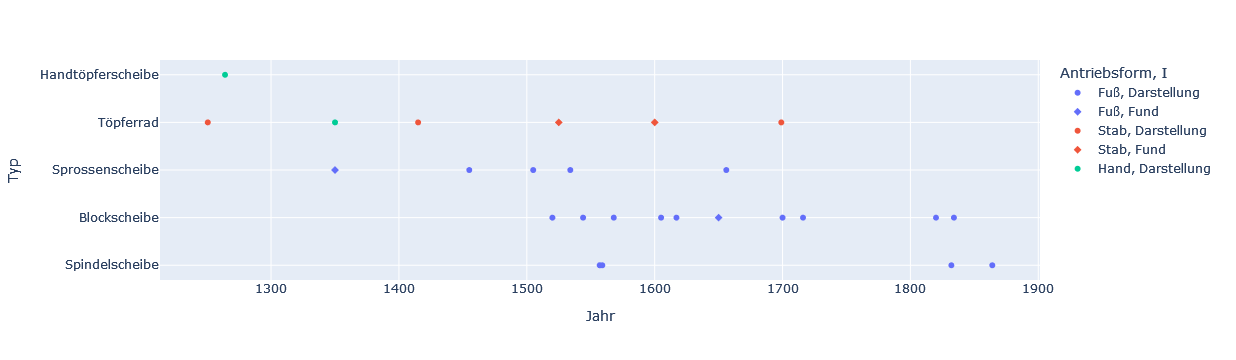

In [50]:
figure1 = px.scatter(data, x='Jahr', y='Typ', color='Antriebsform', symbol='I')
figure1.show()

### 2.2 3D-Streudiagramm mit Bodenkarte

#### 2.2.1 Erstellung des Diagramms mit Markierungen

In [45]:
figure2 = px.scatter_3d(data, x='Länge', y='Breite', z='Jahr', color='Typ', symbol='I', size_max=1, width=1000, height=800)

# Hinzufügen einer Linie für jedes Objekt, dass anstatt eines einzigen Jahrs einen Zeitraum angegeben hatte 
for i, o in data.iterrows():
    if isinstance(o['Datierung'], list):
        figure2.add_trace(go.Scatter3d(
            x=[o['Länge'], o['Länge']],
            y=[o['Breite'], o['Breite']],
            z=[o['Datierung'][0], o['Datierung'][1]],
            mode='lines',
            line=dict(color='black', width=2),
            showlegend=False
        ))

#### 2.2.2 Einlesen und Filterung der Kartendaten

In [46]:
# Einlesen der geojson-Datei
with open('europe.geojson') as json_file: # siehe Referenzen
    Europa = geojson.load(json_file)

Polygons = []

# Sammlung der benötigten Länder
for country_feature in Europa['features']:
    if country_feature['properties']['ISO2'] in data['Land'].tolist():
        Polygons.append(country_feature['geometry']['coordinates'])

# Erstellung der Arrays, die zusammen die Punkte der Karte beinhalten
x, y, z = [], [], []

for country in Polygons:
    for region in country:
        for point in region:
            if len(point) == 2:
                x.append(point[0])
                y.append(point[1])
                z.append(1000)
            else:
                for p in point:
                    x.append(p[0])
                    y.append(p[1])
                    z.append(1000)
                x.append(None)
                y.append(None)
                z.append(None)
        x.append(None)
        y.append(None)
        z.append(None)

#### 2.2.3 Ermittlung der Position der Himmelsrichtungssymbole

In [47]:
# Ermittlung der Position der Himmelsrichtungssymbole
min_x = min([value for value in x if value is not None])
max_x = max([value for value in x if value is not None])

min_y = min([value for value in y if value is not None])
max_y = max([value for value in y if value is not None])

N = [(min_x + max_x) / 2, max_y]
S = [(min_x + max_x) / 2, min_y]
W = [min_x, (min_y + max_y) / 2]
O = [max_x, (min_y + max_y) / 2]

#### 2.2.4 Hinzufügen der Karte und der Himmelsrichtungssymbole

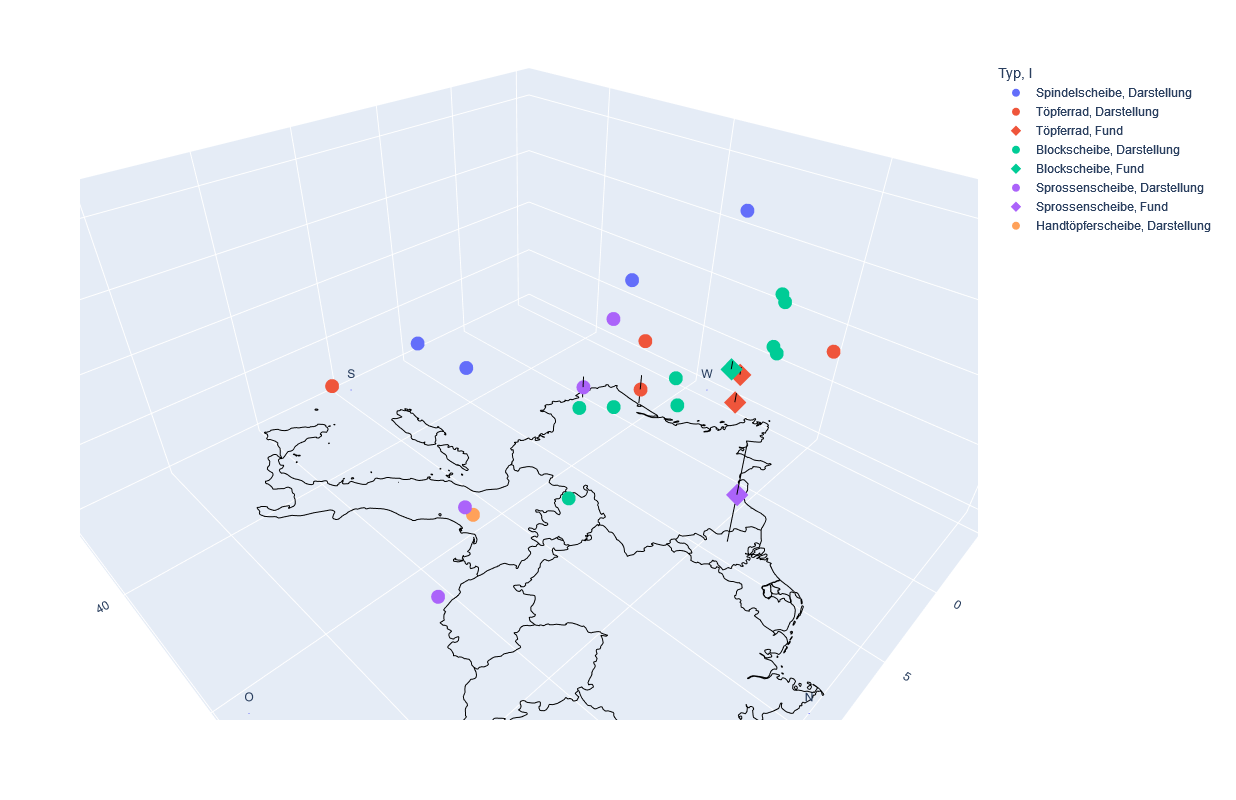

In [49]:
# Hinzufügen der Karte 
figure2.add_trace(go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
))

# Hinzufügen der Himmelsrichtungssymbole
figure2.add_trace(go.Scatter3d(
    x=[N[0], S[0], W[0], O[0]],
    y=[N[1], S[1], W[1], O[1]],
    z=[1000] * 4,
    mode='markers+text',
    marker=dict(size=0.5, color='blue'),
    text=['N', 'S', 'W', 'O'],
    showlegend=False
))

# Anpassung des Layouts
figure2.update_layout(
    scene=dict(aspectratio=dict(x=2, y=2, z=1)),
    font=dict(family='Arial')
)

## 3. Referenzen

<ul>
    <li>Bibiotheken:</li>
    <ul>
        <li><a href=https://pandas.pydata.org/>Pandas</a></li>
        <li><a href=https://plotly.com/python>Plotly</a></li>
        <li><a href=https://pypi.org/project/geojson/>geoJSON</a></li>
    </ul>
    <li>Kartendaten: <a href="https://github.com/leakyMirror/map-of-europe">GitHub</a></li>
</ul>